In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Calcular la matriz de Covarianza

In [ ]:
import numpy as np

# Calcula la matriz de covarianza
cov_matrix = np.cov(df, rowvar=False)

print(cov_matrix)

In [ ]:
import numpy as np

# Calcula la matriz de covarianza
cov_matrix = np.cov(df, rowvar=False)

# Convierte la matriz de covarianza en un DataFrame de Pandas
cov_df = pd.DataFrame(cov_matrix, columns=df.columns, index=df.columns)

# Muestra la matriz de covarianza formateada
print(cov_df)

## Calcular vectores y valores propios

In [ ]:
# Calcular los valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar los valores propios y sus vectores correspondientes de forma descendente
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
for i in range(len(eigenvalues)):
    print(f"Valor Propio {i + 1}: {eigenvalues[i]}")
    print(f"Vector Propio {i + 1}:\n{eigenvectors[:, i]}")

Valor Propio 1: 0.2200921970870899
Vector Propio 1:
[-0.13336766  0.24851581 -0.00073917  0.17783862 -0.08865728 -0.39507087
 -0.41458979  0.33310861 -0.2529021   0.09232904 -0.25113726 -0.4734921
 -0.28686211]
Valor Propio 2: 0.10246083966837399
Vector Propio 2:
[-0.55088368 -0.22739058 -0.1630912   0.07977633 -0.18816566 -0.07414473
 -0.00100692 -0.00996037 -0.03141788 -0.5197075   0.23720622  0.21556225
 -0.44388836]
Valor Propio 3: 0.046242471978384554
Vector Propio 3:
[ 0.08384838 -0.49203927 -0.40300937 -0.47724241 -0.0065507  -0.25306514
 -0.19610546 -0.28598186 -0.22834235  0.03309997  0.10658878 -0.29777629
  0.15196829]
Valor Propio 4: 0.04011225792515992
Vector Propio 4:
[-0.04032815  0.48603202 -0.24197565 -0.08169399  0.01588017 -0.05264323
 -0.02703323 -0.70909528  0.07657367 -0.02632204 -0.35249801  0.08206201
 -0.2297925 ]
Valor Propio 5: 0.030058769060629056
Vector Propio 5:
[ 0.27801009  0.41288996 -0.2863938  -0.41830488 -0.47089872  0.01802978
 -0.00257298  0.360037

In [ ]:
# Como ejemplo se reducirá la dimensionalidad a n_componentes, en este caso 2
n_componentes = 2

# Transponer los vectores principales seleccionados
selected_eigenvectors = eigenvectors[:, :n_componentes]

# Transforma los datos originales
transformed_data = np.dot(data, selected_eigenvectors)

In [ ]:
transformed_data

array([[-319.92525173, -506.14273108],
       [-313.29630781, -493.56769325],
       [-351.04418819, -554.07674838],
       [-437.58892567, -689.11047423],
       [-222.49632111, -356.77512711],
       [-428.7070013 , -675.0781598 ],
       [-381.32281758, -600.23506091],
       [-384.20248966, -606.69842672],
       [-311.3391932 , -492.00261696],
       [-311.27434366, -492.37149433],
       [-444.96961784, -699.53409297],
       [-377.48980901, -595.13658665],
       [-388.78621766, -612.03180003],
       [-341.90084048, -537.84150748],
       [-456.63373034, -716.97666129],
       [-387.64296461, -612.68914436],
       [-379.44495461, -600.59237257],
       [-336.01734335, -532.92860079],
       [-494.20593573, -777.25315084],
       [-255.07744467, -406.29234897],
       [-238.00894727, -379.32534347],
       [-231.27974701, -369.50369273],
       [-308.65702478, -486.56689921],
       [-301.6146147 , -476.09220558],
       [-252.87856107, -400.81362509],
       [-249.8240306 , -3

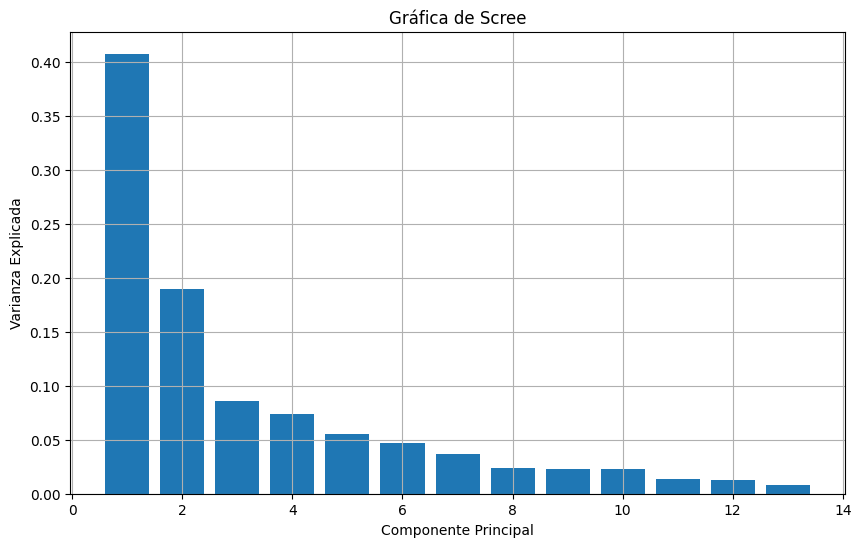

Se necesitan 10 componentes principales para mantener el 95% de la varianza.


In [ ]:
# Calcula la varianza total
total_variance = np.sum(eigenvalues)

# Calcula la varianza explicada por cada componente principal
explained_variance = eigenvalues / total_variance

# Trazar la gráfica de Scree
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Gráfica de Scree')
plt.grid(True)
plt.show()

# Calcular cuántos componentes necesitas para mantener el 95% de la varianza
cumulative_variance = np.cumsum(explained_variance)
n_components_needed = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Se necesitan {n_components_needed} componentes principales para mantener el 95% de la varianza.")